# 4.0 CCLE Test

In [1]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)
df = {}

import clustergrammer_groupby as cby
import gene_exp_10x

In [2]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline 

### Load Data

In [3]:
net.load_file('../data/big_data/CCLE.txt')
df['ini'] = net.export_df()
df['ini'].shape

cols = df['ini'].columns.tolist()
new_cols = [(x[0], x[1]) for x in cols]
df['ini'].columns = new_cols

In [4]:
df['ini'].head()

,"(cell line: LN18, tissue: central_nervous_system)","(cell line: 769P, tissue: kidney)","(cell line: 786O, tissue: kidney)","(cell line: CAOV3, tissue: ovary)","(cell line: HEPG2, tissue: liver)","(cell line: MOLT4, tissue: haematopoietic_and_lymphoid_tissue)","(cell line: NCIH524, tissue: lung)","(cell line: NCIH209, tissue: lung)","(cell line: MIAPACA2, tissue: pancreas)","(cell line: MCAS, tissue: ovary)",...,"(cell line: SLR21, tissue: kidney)","(cell line: LNZ308, tissue: central_nervous_system)","(cell line: LN340, tissue: central_nervous_system)","(cell line: HCC827GR5, tissue: lung)","(cell line: SLR20, tissue: kidney)","(cell line: HK2, tissue: kidney)","(cell line: EW8, tissue: bone)","(cell line: UOK101, tissue: kidney)","(cell line: JHESOAD1, tissue: oesophagus)","(cell line: CH157MN, tissue: central_nervous_system)"
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828


### Visualize Subset of Original Dataset

In [17]:
net.load_df(df['ini'])
net.filter_N_top(inst_rc='row', N_top=100, rank_type='var')
net.normalize(axis='row', norm_type='zscore')
net.random_sample(axis='col', num_samples=100, random_state=99)
df['small-z'] = net.export_df()
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [15]:
net.load_df(df['ini'])
net.normalize(axis='row', norm_type='zscore')
df['ini-z'] = net.export_df()
df['ini-z'].shape

(18874, 1037)

# Similarity of Same- and Different-Category Samples

{'mannwhitney': 0.0, 'ttest': 0.0}
CPU times: user 25.1 s, sys: 1.11 s, total: 26.2 s
Wall time: 26.4 s


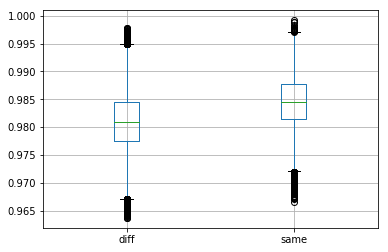

In [12]:
%%time
sim_dict, pval_dict = cby.sim_same_and_diff_category_samples(df['ini'])
print(pval_dict)

df['sim_cats'] = pd.DataFrame(sim_dict)
ax = df['sim_cats'].boxplot(return_type='axes')

{'mannwhitney': 0.0, 'ttest': 0.0}
CPU times: user 24.5 s, sys: 1 s, total: 25.5 s
Wall time: 25.6 s


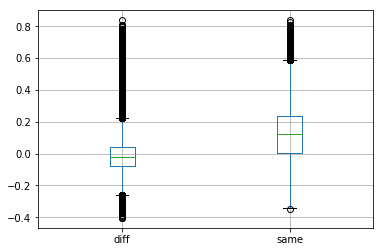

In [13]:
%%time
sim_dict, pval_dict = cby.sim_same_and_diff_category_samples(df['ini-z'])
print(pval_dict)

df['sim_cats'] = pd.DataFrame(sim_dict)
ax = df['sim_cats'].boxplot(return_type='axes')

{'mannwhitney': 1.3501185961668493e-40, 'ttest': 2.9598088223171594e-34}
CPU times: user 149 ms, sys: 2.77 ms, total: 152 ms
Wall time: 152 ms


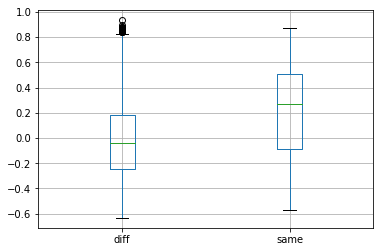

In [18]:
%%time
sim_dict, pval_dict = cby.sim_same_and_diff_category_samples(df['small-z'])
print(pval_dict)

df['sim_cats'] = pd.DataFrame(sim_dict)
ax = df['sim_cats'].boxplot(return_type='axes')

# Make signature and predict

In [ ]:
%%time
num_top_dims = 15
df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['ini-z'], 'tissue', pval_cutoff=0.05, 
                                                                     num_top_dims=num_top_dims)
print(df['cat_sig'].shape)

In [ ]:
df['pred_cat'], df['sig_sim'], y_info = cby.predict_cats_from_sigs(df['ini-z'], df['cat_sig'])
df['conf'], populations, ser_correct, fraction_correct = cby.confusion_matrix_and_correct_series(y_info)
print(fraction_correct)

### Tissue Signature

In [ ]:
net.load_df(df['cat_sig'])
net.cluster()
net.widget()

In [ ]:
net.load_df(df['pred_cat'])
net.random_sample(axis='col', num_samples=100, random_state=99)
net.cluster()
net.widget()

# Shuffle Labels and Predict Tissues

In [ ]:
%%time
num_shuffles = 100
perform_ser = cby.compare_performance_to_shuffled_labels(df['ini-z'], 'tissue', 
                                                         num_shuffles=num_shuffles, num_top_dims=num_top_dims)
print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())
print('previously calc real performance: ', fraction_correct)

# Overfitting on ~20 Cell Lines

In [ ]:
net.load_df(df['ini-z'])
net.random_sample(axis='col', num_samples=20, random_state=99)
df['subset-z'] = net.export_df()
df['subset-z'].shape

In [ ]:
net.load_df(df['subset-z'])
net.filter_N_top(inst_rc='row', N_top=100, rank_type='var')
net.normalize(axis='row', norm_type='zscore')
net.cluster()
net.widget()

In [ ]:
%%time
num_top_dims = 15
df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['subset-z'], 'tissue', pval_cutoff=0.05, 
                                                                     num_top_dims=num_top_dims)
print(df['cat_sig'].shape)

df['pred_cat'], df['sig_sim'], y_info = cby.predict_cats_from_sigs(df['subset-z'], df['cat_sig'])
df['conf'], populations, ser_correct, fraction_correct = cby.confusion_matrix_and_correct_series(y_info)
print(fraction_correct)

In [ ]:
net.load_df(df['pred_cat'])
net.cluster()
net.widget()

### Shuffled labels on small number of samples

In [ ]:
%%time
num_shuffles = 10
perform_ser = cby.compare_performance_to_shuffled_labels(df['subset-z'], 'tissue', 
                                                         num_shuffles=num_shuffles, num_top_dims=num_top_dims)
print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())
print('previously calc real performance: ', fraction_correct)

### Increase the number of samples

In [ ]:
%%time

for num_samples in [20, 50, 75, 100, 200, 500, 750, 1000]:
    
    net.load_df(df['ini-z'])
    net.random_sample(axis='col', num_samples=num_samples, random_state=99)
    df['subset-z'] = net.export_df()
    df['subset-z'].shape    

    print('\nnum samples: '+ str(num_samples) +'\n-------------------------')
    
    num_shuffles = 10
    perform_ser = cby.compare_performance_to_shuffled_labels(df['subset-z'], 'tissue', 
                                                             num_shuffles=num_shuffles, num_top_dims=num_top_dims)

    print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())

### Increase the number of samples on pre-filtered data

In [ ]:
num_var_genes = 1000
net.load_df(df['ini'])
net.filter_N_top(inst_rc='row', N_top=num_var_genes, rank_type='var')
net.normalize(axis='row', norm_type='zscore')
df['ini-var-z'] = net.export_df()
df['ini-var-z'].shape

In [ ]:
%%time

for num_samples in [20, 50, 75, 100, 200, 500, 750, 1000]:
    
    net.load_df(df['ini-var-z'])
    net.random_sample(axis='col', num_samples=num_samples, random_state=99)
    df['subset-z'] = net.export_df()
    df['subset-z'].shape    

    print('\nnum samples: '+ str(num_samples) +'\n-------------------------')
    
    num_shuffles = 10
    perform_ser = cby.compare_performance_to_shuffled_labels(df['subset-z'], 'tissue', 
                                                             num_shuffles=num_shuffles, num_top_dims=num_top_dims)

    print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())